#  Case Studies

## Case Study 1: Cause of Deaths in the United States (1999–2015)
This study analyses the leading causes of death in the United States of America between 1999 and 2015.

## Data Gathering
It’s important to gather a study’s data set from a reliable source; it’s also important to use an updated and accurate data set to get
unbiased findings. The data set in this case study comes from open data from the U.S. government, which can be accessed through
https://data.gov. You can download it from here:
https://catalog.data.gov/dataset/age-adjusted-death-ratesfor-the-top-10-leading-causes-of-death-united-states-2013

This case study will try to answer the following questions:
1. What is the total number of records in the dataset?
2. What were the causes of death in this data set?
3. What was the total number of deaths in the United States from 1999 to 2015?
4. What is the number of deaths per each year from 1999 to 2015?
5. Which ten states had the highest number of deaths overall?
6. What were the top causes of deaths in the United States during this period?

## Data Analysis
Let’s first read and clean the data set.
### 1. What is the total number of recorded death cases?

In [1]:
# Cleaned Records of Death Causes in the United States
import pandas as pd
data = pd.read_csv('NCHS.csv')
data.head(3)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8


In [2]:
data['Deaths'].sum()

153622150.0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15028 entries, 0 to 15027
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     15028 non-null  int64  
 1   113 Cause Name           15028 non-null  object 
 2   Cause Name               15028 non-null  object 
 3   State                    15028 non-null  object 
 4   Deaths                   15013 non-null  float64
 5   Age-adjusted Death Rate  14917 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 704.6+ KB


In [22]:
data.isnull()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
15023,False,False,False,False,False,False
15024,False,False,False,False,False,False
15025,False,False,False,False,False,False
15026,False,False,False,False,False,False


In [23]:
data.shape

(15028, 6)

In [24]:
data.dropna()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7
...,...,...,...,...,...,...
15023,2015,Septicemia (A40-A41),Septicemia,Virginia,1187.0,13.0
15024,2015,Septicemia (A40-A41),Septicemia,Washington,501.0,6.3
15025,2015,Septicemia (A40-A41),Septicemia,West Virginia,348.0,13.9
15026,2015,Septicemia (A40-A41),Septicemia,Wisconsin,517.0,7.2


In [25]:
data.shape

(15028, 6)

Approximately 14,917 death cases were recorded in different U.S. states.

## Now let’s clean the data to find the number of death causes in the data set.
### 2. What were the causes of death in this dataset?

In [26]:
# Unique Death Causes in the United States
causes = data['Cause Name'].unique()

In [27]:
causes

array(['Unintentional Injuries', 'All Causes', "Alzheimer's disease",
       'Homicide', 'Stroke', 'Chronic liver disease and cirrhosis',
       'CLRD', 'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease',
       'Influenza and pneumonia', 'Cancer', 'Suicide', 'Kidney Disease',
       "Parkinson's disease", 'Pneumonitis due to solids and liquids',
       'Septicemia'], dtype=object)

In [28]:
# Remove All Causes from the Cause Name column.
data = data[data['Cause Name'] != 'All Causes']
causes = data['Cause Name'].unique()
causes

array(['Unintentional Injuries', "Alzheimer's disease", 'Homicide',
       'Stroke', 'Chronic liver disease and cirrhosis', 'CLRD',
       'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease',
       'Influenza and pneumonia', 'Cancer', 'Suicide', 'Kidney Disease',
       "Parkinson's disease", 'Pneumonitis due to solids and liquids',
       'Septicemia'], dtype=object)

In [29]:
len(causes)

16

As shown, there are 16 death causes according to the loaded data set.

## Clean the data to find the unique states included in the study.

In [30]:
states = data['State'].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [31]:
data = data[data['State'] != 'United States']
state1 = data['State'].unique()
state1

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [32]:
len(state1)

51

There are 51 states included in the study

### 3. What was the total number of deaths in the United States from 1999 to 2015?

In [33]:
death = data['Deaths'].sum()

In [34]:
death

34640199.0

The total number of deaths during the given period is 34,640,199

### 4. What is the number of deaths for each year from 1999 to 2015?

In [35]:
# Study’s Death Trends per Year
dyear= data.groupby(["Year"]).sum()
dyear

,Deaths,Age-adjusted Death Rate
Year,,
1999,2026478.0,37808.1
2000,2027126.0,37403.1
2001,2032019.0,36922.5
2002,2052413.0,36784.2
2003,2048691.0,36198.4
2004,1999721.0,34681.1
2005,2031496.0,34692.7
2006,1995337.0,33462.2
2007,1989666.0,32769.1


<AxesSubplot:title={'center':'Death per year \n 1999-2015'}, xlabel='Year'>

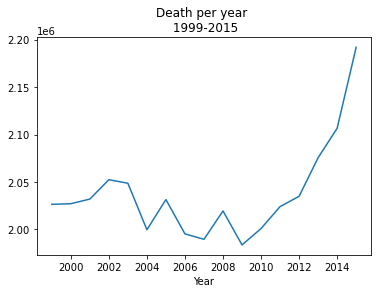

In [38]:
dyear["Deaths"].plot(title="Death per year \n 1999-2015")

The number of deaths declined between 2002 and 2009. Then there was a continuous growth in the number of deaths from 2010 to 2013.
Finally, there was a sharp increase in the number of deaths in 2013 and 2014.

# Data Visualization
Plotting data gives a clear idea about patterns behind the data and helps to make the right decisions in business.
### 5. Which ten states had the highest number of deaths overall?

In [39]:
# Top Ten States with the Highest Number of Deaths in the United States

data1 = data[data["State"] !="United States"]
dataset2 = data1.groupby("State").sum()
dataset2.sort_values("Deaths", ascending=False , inplace = True)
dataset2.head(10)

,Year,Deaths,Age-adjusted Death Rate
State,,,
California,545904,3422459.0,10101.2
Florida,545904,2397507.0,10156.8
Texas,545904,2270961.0,11339.7
New York,545904,2170019.0,10226.5
Pennsylvania,545904,1785982.0,11334.1
Ohio,545904,1529552.0,11931.3
Illinois,545904,1460489.0,11170.8
Michigan,545904,1248155.0,11645.7
North Carolina,545904,1063835.0,11737.3


<AxesSubplot:title={'center':'Top ten states with highest death number \n 1999-2015 '}, xlabel='State'>

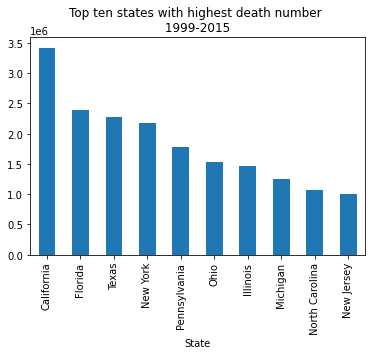

In [40]:
dataset2["Deaths"].head(10).plot.bar(title= "Top ten states with highest death number \n 1999-2015 ")

California had the highest number of deaths in the United States, with Florida coming in second.

### 6. What were the top causes of deaths in the United States during this period?

In [41]:
# Top Ten Causes of Death in the United States
dataset1 = data[data["Cause Name"] !="All Causes"]
dataset2 = dataset1.groupby("Cause Name").sum()
dataset2.sort_values("Deaths", ascending=False , inplace = True)
dataset2.head(10)

,Year,Deaths,Age-adjusted Death Rate
Cause Name,,,
Diseases of Heart,1740069,10939923.0,174817.3
Cancer,1740069,9646498.0,157107.6
Stroke,1740069,2437998.0,40672.7
CLRD,1740069,2280130.0,38818.7
Unintentional Injuries,1740069,2016510.0,36713.7
Alzheimer's disease,1740069,1257309.0,21042.8
Diabetes,1740069,1236321.0,20459.0
Influenza and pneumonia,1740069,987432.0,16181.1
Kidney Disease,1740069,757934.0,12315.0


<AxesSubplot:title={'center':'Top ten causes of death in USA \n 1999-2015 '}, xlabel='Cause Name'>

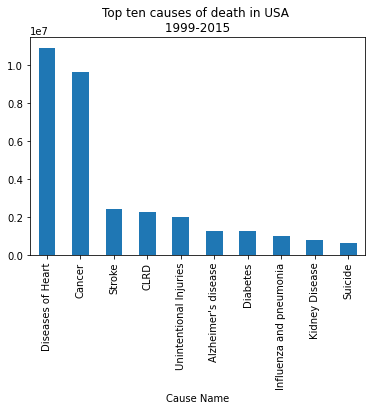

In [42]:
dataset2['Deaths'].head(10).plot.bar(title="Top ten causes of death in USA \n 1999-2015 ")

Diseases of the heart represent the biggest cause of death followed by cancer.

## Findings
summarizes the study findings.

### Investigation Question  with Findings
1. What is the total number of records in the dataset?
There were approximately 14,917 deaths recorded in the united states.
2. What were the causes of death in this data set?
There are 16 causes of death according to the study data set.
3. What was the total number of deaths in the united states from 1999 to 2015?
The total number of deaths during the given period is 34,640,199.0.
4. What is the number of deaths per year from 1999 to 2015?
From 2002 to 2009 the number of deaths declined, then there an increase from 2010 to 2013. in 2013 and 2014, there was a
sharp increase in the number of deaths.
5. Which ten states had the highest number of deaths overall?
California had the most deaths in the united states, with Florida in second place.
6. What were the top causes of deaths in the united states during this period?
Diseases of the heart represent the highest causes of death followed by cancer.

## Case Study 2: Analyzing Gun Deaths in the United States (2012–2014)
This study analyzes gun deaths in the United States of America between 2012 and 2014.
### This case study will try to answer the following questions:
1. What is the number of annual suicide gun deaths in the United States from 2012 to 2014, by gender?
2. What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?
3. What is the annual number of gun deaths in the United States on average from 2012 to 2014, by cause?
4. What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?
5. What is the percentage of annual suicide gun deaths in the United States from 2012 to 2014, by year?

## Data Gathering
The data set for this study comes from GitHub and can be accessed here:
https://github.com/fivethirtyeight/guns-data.git

In [20]:
# Load and clean the dataset and prepare it for processing.

# Reading Gun Deaths in the United States (2012–2014) Data Set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes=True)
%matplotlib inline

In [7]:
map?

In [21]:
dataset = pd.read_csv('Death data.csv', index_col=0)
print(dataset.shape)
dataset.index.name = 'Index'
dataset.columns = map(str.capitalize, dataset.columns)
dataset.head(5)

(100798, 10)


,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [22]:
# Organize the data set by year and then by month.
dataset_Gun = dataset
dataset_Gun.sort_values(['Year', 'Month'], inplace=True)

## Data Analysis
Now let’s look at the data and make some analysis.
### 1. How many males and females are included in this study?

In [23]:
dataset_Gun['Sex'].count()

100798

In [24]:
dataset_Gun.Sex.value_counts(normalize=False)

M    86349
F    14449
Name: Sex, dtype: int64

### 2. How many educated females are included in this study?

In [25]:
# Group the data set by gender.
dataset_byGender = dataset_Gun.groupby('Sex').count()
dataset_byGender

,Year,Month,Intent,Police,Age,Race,Hispanic,Place,Education
Sex,,,,,,,,,
F,14449,14449,14449,14449,14446,14449,14449,14386,14243
M,86349,86349,86348,86349,86334,86349,86349,85028,85133


As shown here, there are 14,243 educated females involved in this study

## Data Visualization
In this case study, we will try to find the answers to the numerous questions posed earlier. Let’s get started.

### 3. What is the number of suicide gun deaths in the United States from 2012 to 2014, by gender?

<AxesSubplot:title={'center':'Annual U.S.\\suicide gun deaths \n 2012-2014, by gender'}>

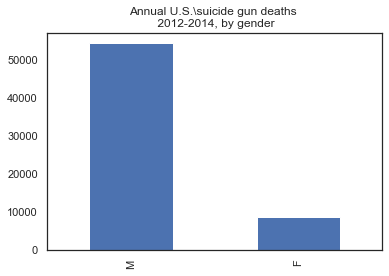

In [26]:
dataset_suicide_Gender = dataset_Gun[dataset_Gun['Intent'] == 'Suicide']
dataset_suicide_Gender.Sex.value_counts (normalize=False).plot.bar(title='Annual U.S.\\suicide gun deaths \n 2012-2014, by gender')

It’s clear that there are huge differences between males and females. The number of male suicides by gun is above 50,000, while the female death rate is below 10,000, which shows how males are more likely to commit suicide using a gun.

<AxesSubplot:title={'center':'Annual U.S. suicide gun deaths \n 2012-2014, by gender'}, xlabel='Sex'>

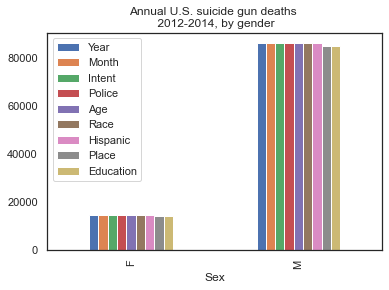

In [27]:
dataset_byGender.plot.bar(title='Annual U.S. suicide gun deaths \n 2012-2014, by gender')

### 4. What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?

In [32]:
# Analyzing and Visualizing Gun Death Percentage by Race
#dataset_byRace = dataset
dataset_byRace = dataset
(dataset_byRace.Race.value_counts(ascending=False)*100/100000)

White                             66.237
Black                             23.296
Hispanic                           9.022
Asian/Pacific Islander             1.326
Native American/Native Alaskan     0.917
Name: Race, dtype: float64

The highest death rate was for white people, then black, and then Hispanic. There are a few other races listed, but the rates are small comparatively.

<AxesSubplot:title={'center':'Percent death toll from guns in the United States \nfrom 2012 to 2014, by race'}>

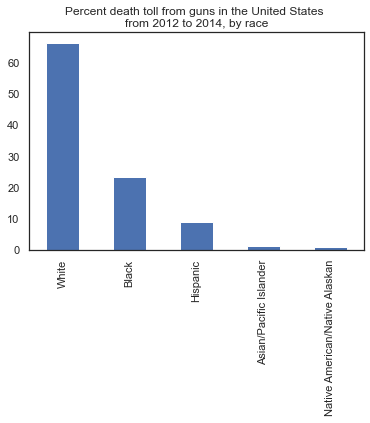

In [33]:
(dataset_byRace.Race.value_counts(ascending=False) *100/100000).plot.bar(title='Percent death toll from guns in the United States \nfrom 2012 to 2014, by race')

### 5. What is the number of gun deaths in the United States on average from 2012 to 2014, by cause?

In [34]:
# Visualizing Gun Death by Cause
dataset_byRace.Intent.value_counts(sort =True, ascending=False)

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: Intent, dtype: int64

<AxesSubplot:title={'center':'Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause'}>

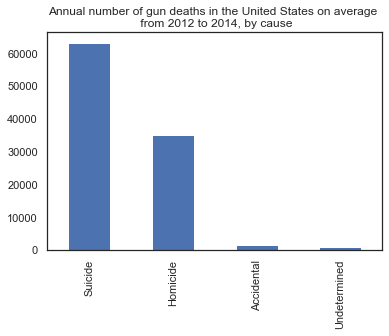

In [35]:
dataset_byRace.Intent.value_counts(sort=True).plot.bar(title='Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause')

The figure shows a high number of suicide and homicide deaths compared to a low number of deaths due to accidents.

### 6. What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?

In [36]:
# Visualizing Gun Death per 100,000 by Cause
dataset_byRace.Intent.value_counts(ascending=False)*100/100000

Suicide         63.175
Homicide        35.176
Accidental       1.639
Undetermined     0.807
Name: Intent, dtype: float64

<AxesSubplot:title={'center':'Rate gun deaths in the U.S. per 100,000 population \n2012-2014, by race'}>

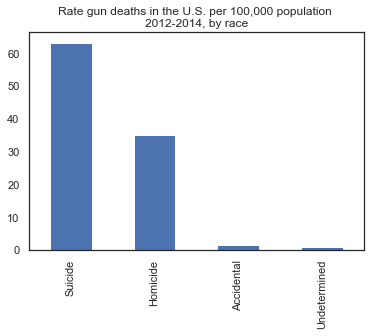

In [37]:
(dataset_byRace.Intent.value_counts(ascending=False)*100/100000).plot.bar(title='Rate gun deaths in the U.S. per 100,000 population \n2012-2014, by race')

This shows that there are 60 suicide cases for every 100,000 people. In addition, there are 30 homicide cases for every 100,000.

### 5. What is the percentage of suicide gun deaths in the United States from 2012 to 2014, by year?

In [38]:
# Visualizing Gun Death by Year
dataset_suicide = dataset[ dataset["Intent"]=="Suicide"]
datasetSuicide= dataset_suicide.Year.value_counts(ascending=False) *100/100000
datasetSuicide.sort_values(ascending=True)

2012    20.666
2013    21.175
2014    21.334
Name: Year, dtype: float64

<AxesSubplot:title={'center':'Percentage of annual suicide gun deaths in the United States \nfrom 2012 to 2014, by year'}>

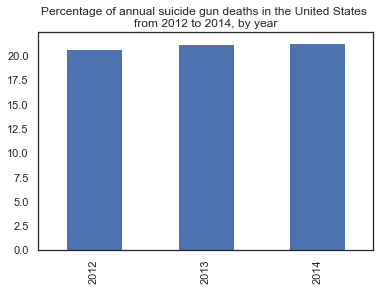

In [39]:
datasetSuicide.sort_values(ascending=True).plot.bar(title='Percentage of annual suicide gun deaths in the United States \nfrom 2012 to 2014, by year')

The figure shows almost the same number of suicides each year over three years, which means that this is a regular pattern.

## Findings

### Investigation Question and Findings
1. What is the number of u.s. suicide gun deaths from 2012 to 2014, by gender?

Male suicide gun deaths is over 50,000, while females suicide gun deaths is below 10,000, which shows how males are more likely to commit suicide with a gun.

2. What is the number of gun deaths in the united states per a 100,000 population from 2012 to 2014? 

The highest number of deaths is for while people, then black, and then hispanic.

3. What are the annual number of gun deaths in the united states on average from 2012 to 2014, by cause?

There is a high number of suicide and homicide deaths compared to a low number of deaths due to accidents.

4. What is the 100,000 percentage of annual guns death tolls in the united states from 2012 to 2014, by cause?

The 100,000 percentages shows that there are 60 suicide cases for every 100,000 people, which somehow is not a high rate. in addition, there are 30 homicide cases for every 100,000 people.

5. What is the percentage of annual suicide gun deaths in the united states from 2012 to 2014, by year?

The analysis shows almost the same number of suicides each year over a period of three years, which means that this is a regular pattern in society.